# Import necessary libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

# Load the dataset

In [9]:
data = pd.read_csv('/workspaces/swiss-data-science-demos-/ml_model_development/data/drug_trial_data.csv')


# Display first few rows of the data

In [10]:
data.head()

,trial_id,patient_id,age,gender,drug_dosage,side_effects,success_indicator,genetic_marker,baseline_health
0,1,25795,32,Male,79.238014,0,0,0,0.495509
1,2,10860,34,Female,71.927428,1,1,0,0.106619
2,3,86820,57,Female,129.231858,0,1,0,0.345581
3,4,64886,35,Female,214.169121,0,1,0,0.148385
4,5,16265,72,Female,73.061350,1,1,0,0.636040


# Data exploration: Visualize the distribution of the 'success_indicator'

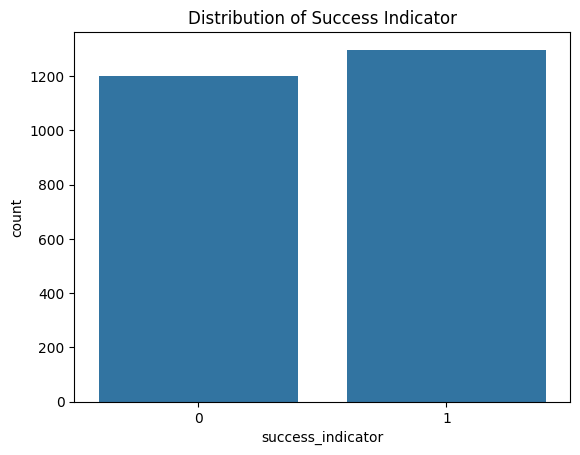

In [11]:
sns.countplot(x='success_indicator', data=data)
plt.title('Distribution of Success Indicator')
plt.show()

# Visualize correlation between features

In [12]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

ValueError: could not convert string to float: 'Male'

# Select features and target

In [13]:
X = data[['age', 'drug_dosage', 'side_effects', 'genetic_marker', 'baseline_health']]
y = data['success_indicator']

# Split data into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'train_test_split' is not defined

# Scale features

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'StandardScaler' is not defined

# Build a neural network model

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])


NameError: name 'tf' is not defined

# Compile the model

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


NameError: name 'model' is not defined

# Train the model

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)


# Visualize training history

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


Evaluate the model

In [ ]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")